**Problem Statement**
---
We can predict the level of air pollution (e.g., AQI, PM2.5, or other pollutants) in a given city and date, using historical air quality data and potentially other relevant factors like weather conditions or seasonality.

**Objective**
---
The objective of this EDA project is to **analyze and interpret air quality data across different cities and time periods** to uncover trends, patterns, and insights. Specifically, the project aims to:

1. **Understand Pollution Levels**: Identify key pollutants and their contribution to air quality degradation.
2. **City-Wise Comparison**: Compare air quality indices and pollutant levels across cities to determine the most and least polluted regions.
3. **Temporal Patterns**: Explore temporal trends (daily, monthly, or yearly) in pollution levels and AQI to identify seasonal effects or long-term trends.
4. **Data Completeness and Quality**: Investigate missing data, outliers, and inconsistencies, and apply suitable imputation or cleaning methods.
5. **Insights for Policy**: Generate actionable insights to assist policymakers and stakeholders in implementing effective air quality management strategies.

**Importing the dataset**
---

- Import necessary libraries like pandas, matplotlib, numpy, seaborn, and scikit-learn modules.
- Load the air quality dataset from the CSV file 'city_day.csv' using pandas.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
data = pd.read_csv('/content/city_day.csv')
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


**Independent columns are :**

1. **City**: The name of the city where the air quality data was recorded.

2. **Date**: The date on which the data was collected.

3. **PM2.5**: The concentration of particulate matter with a diameter of 2.5 micrometers or smaller, measured in micrograms per cubic meter (µg/m³). These particles are harmful as they can penetrate deeply into the lungs.

4. **PM10**: The concentration of particulate matter with a diameter of 10 micrometers or smaller, measured in micrograms per cubic meter (µg/m³). These are larger particles that can still pose health risks.

5. **NO**: The concentration of Nitric Oxide (NO), a pollutant emitted from combustion processes, measured in micrograms per cubic meter (µg/m³).

6. **NO2**: The concentration of Nitrogen Dioxide (NO2), a harmful gas produced from the burning of fossil fuels, measured in micrograms per cubic meter (µg/m³).

7. **NOx**: The total concentration of Nitrogen Oxides (NO and NO2 combined), measured in micrograms per cubic meter (µg/m³).

8. **NH3**: The concentration of Ammonia (NH3), often released from agricultural activities, measured in micrograms per cubic meter (µg/m³).

9. **CO**: The concentration of Carbon Monoxide (CO), a colorless, odorless gas produced by incomplete combustion, measured in milligrams per cubic meter (mg/m³).

10. **SO2**: The concentration of Sulfur Dioxide (SO2), a gas produced from burning fossil fuels and industrial processes, measured in micrograms per cubic meter (µg/m³).

11. **O3**: The concentration of Ozone (O3), a secondary pollutant formed by the reaction of sunlight with other pollutants, measured in micrograms per cubic meter (µg/m³).

12. **Benzene**: The concentration of Benzene, a volatile organic compound (VOC) and carcinogen, measured in micrograms per cubic meter (µg/m³).

13. **Toluene**: The concentration of Toluene, a VOC used in industrial processes, measured in micrograms per cubic meter (µg/m³).

14. **Xylene**: The concentration of Xylene, a VOC commonly found in industrial emissions, measured in micrograms per cubic meter (µg/m³).

**Target variables are**

1. **AQI (Air Quality Index)**: A standardized value representing overall air quality based on concentrations of pollutants. Higher AQI values indicate worse air quality.

2. **AQI_Bucket**: A categorical representation of the AQI value, indicating the air quality category (e.g., Good, Moderate, Poor, etc.).

**Basic Understanding**
---

- Check the dataset's shape (rows and columns) using data.shape.
- View column names using data.columns.
- Display random data samples using data.sample().
- Examine data types of each column with data.dtypes.
- Identify missing values in each column using data.isnull().sum().
- Get a comprehensive overview of the dataset using data.info().
- Calculate descriptive statistics using data.describe().
- Visualize data distribution using histograms with data.hist().


In [74]:
data.shape
print('The number of rows in this dataset is ',data.shape[0],' and columns are ',data.shape[1])

The number of rows in this dataset is  29531  and columns are  16


In [75]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [76]:
data.sample()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
17334,Jaipur,2019-07-01,34.07,95.18,7.29,22.04,24.42,16.54,0.73,10.83,52.79,0.32,3.03,NaN,102.0,Moderate


In [77]:
data.dtypes

,0
City,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [78]:
data.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [80]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


**Basic visualization**
---


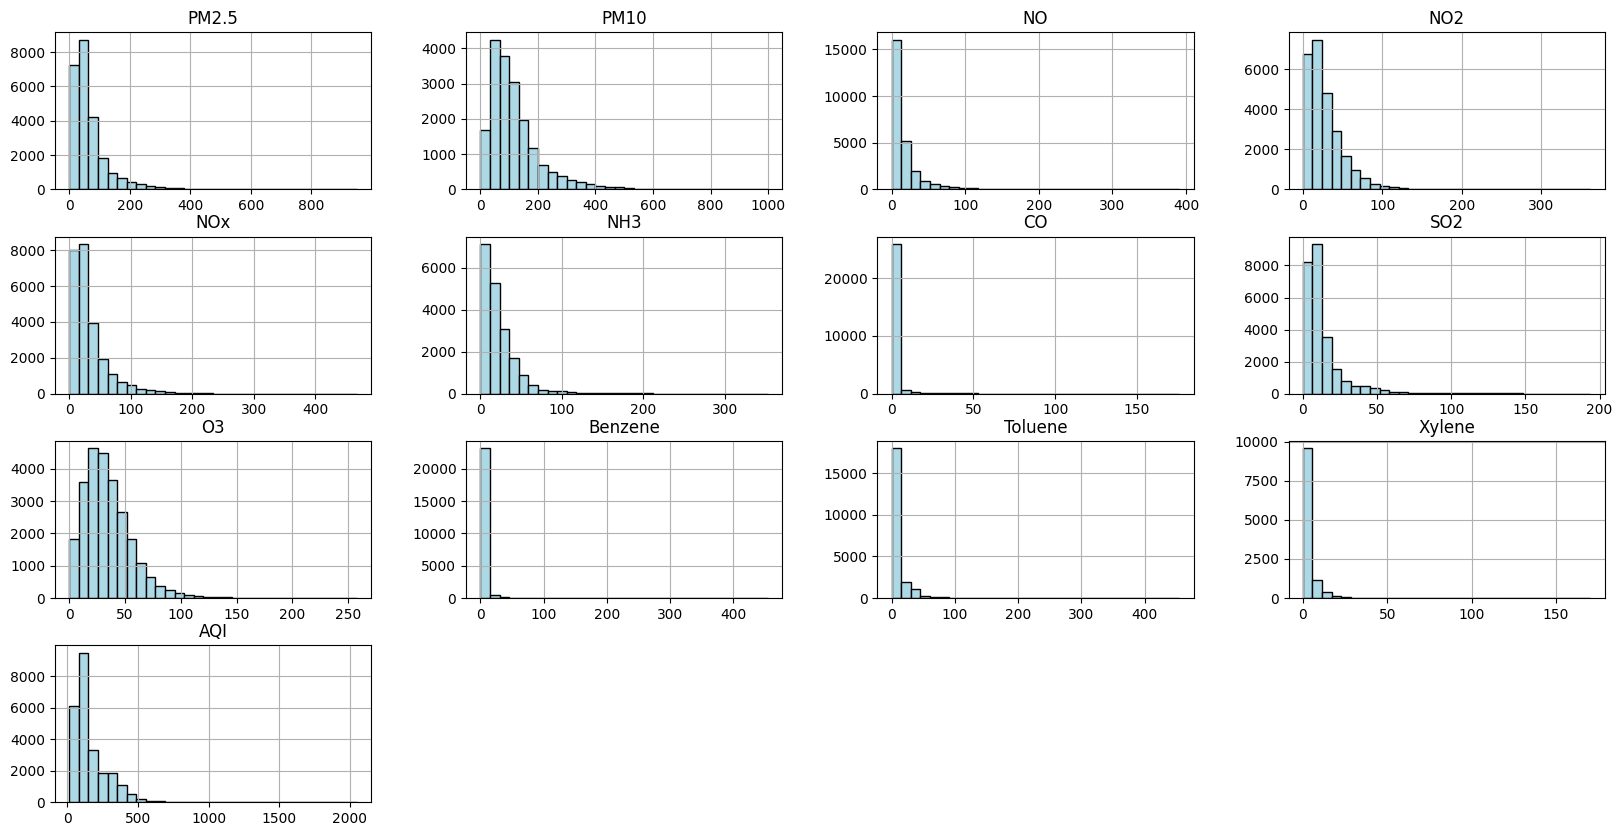

In [81]:
data.hist(color='lightblue',edgecolor='black',figsize=(20,10),bins=30)
plt.show()

**Data Cleaning**
---

- Convert the 'Date' column to datetime objects using pd.to_datetime().
- Extract day, month, and year from the 'Date' column into separate columns.
- Drop unnecessary columns ('Xylene', 'Date', 'AQI_Bucket') using data.drop().
- Fill missing values in numerical columns with their medians using data.fillna().
- Visualize the cleaned data using histograms again.
- Check for and remove duplicate rows using data.duplicated().sum().
- Encode the 'City' column using LabelEncoder for numerical representation.
- Visualize potential outliers using box plots with data.boxplot().

In [82]:
data['Date'] = pd.to_datetime(data['Date'])  # Convert to datetime if not already
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

Splitting date column to sperate day, month and year

In [83]:
# data.head()

In [84]:
data.drop('Xylene', axis=1, inplace = True)
data.drop('Date', axis=1, inplace = True)
data.drop('AQI_Bucket', axis=1, inplace = True)

Droping coloumn 'Xylene' because above 50% of the columns is null values.

Droping coloumn 'Date' because it has been feature engineered.

Droping coloumn 'AQI_Bucket' because it aint the target variable cause it is classification.

In [85]:
data['PM2.5'] = data['PM2.5'].fillna(data['PM2.5'].median())
data['PM10'] = data['PM10'].fillna(data['PM10'].median())
data['NO'] = data['NO'].fillna(data['NO'].median())
data['NO2'] = data['NO2'].fillna(data['NO2'].median())
data['NOx'] = data['NOx'].fillna(data['NOx'].median())
data['NH3'] = data['NH3'].fillna(data['NH3'].median())
data['CO'] = data['CO'].fillna(data['CO'].median())
data['SO2'] = data['SO2'].fillna(data['SO2'].median())
data['O3'] = data['O3'].fillna(data['O3'].median())
data['Benzene'] = data['Benzene'].fillna(data['Benzene'].median())
data['Toluene'] = data['Toluene'].fillna(data['Toluene'].median())
data['AQI'] = data['AQI'].fillna(data['AQI'].median())

Filling all the missing values of the columns with 'median' beacuse it all has a skewness.

In [86]:
data.isnull().sum()

,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


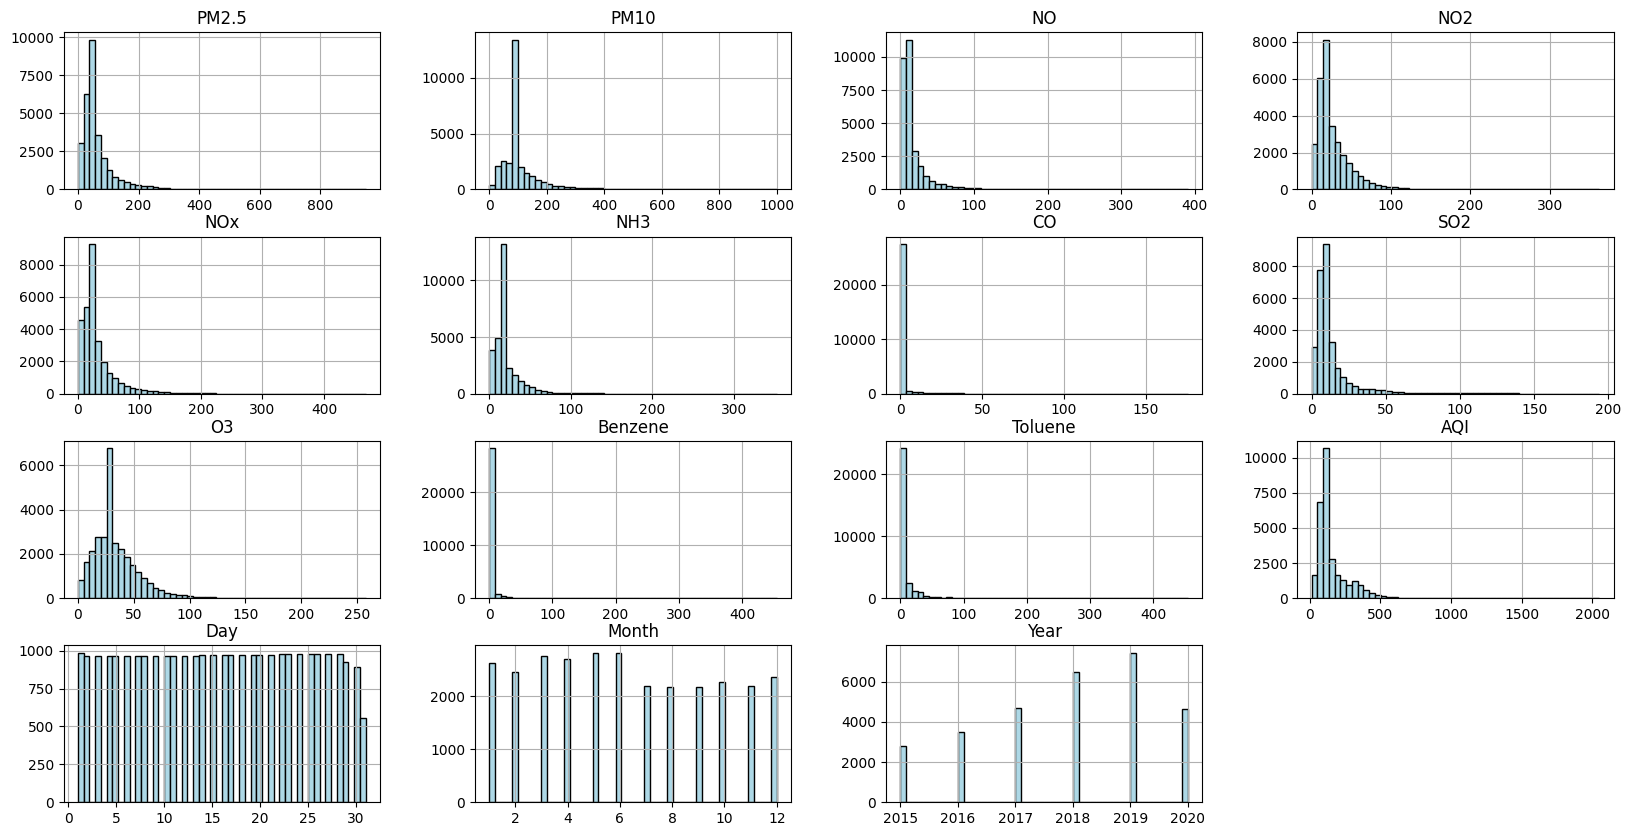

In [87]:
data.hist(color='lightblue',edgecolor='black',figsize=(20,10),bins=50)
plt.show()

In [88]:
data.duplicated().sum()

0

In [89]:
# Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data['City'] = labelencoder.fit_transform(data['City'])

<Axes: >

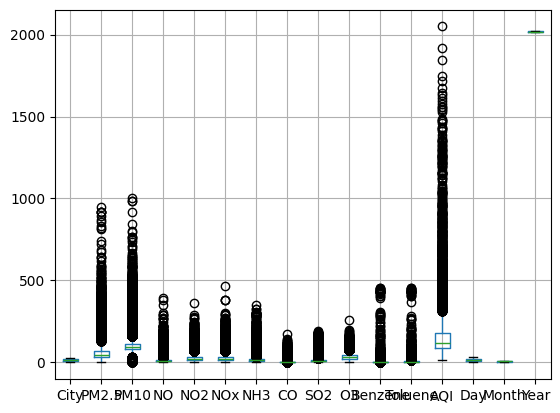

In [90]:
data.boxplot()

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  int64  
 1   PM2.5    29531 non-null  float64
 2   PM10     29531 non-null  float64
 3   NO       29531 non-null  float64
 4   NO2      29531 non-null  float64
 5   NOx      29531 non-null  float64
 6   NH3      29531 non-null  float64
 7   CO       29531 non-null  float64
 8   SO2      29531 non-null  float64
 9   O3       29531 non-null  float64
 10  Benzene  29531 non-null  float64
 11  Toluene  29531 non-null  float64
 12  AQI      29531 non-null  float64
 13  Day      29531 non-null  int32  
 14  Month    29531 non-null  int32  
 15  Year     29531 non-null  int32  
dtypes: float64(12), int32(3), int64(1)
memory usage: 3.3 MB


### **cleaned_data**


In [92]:
cleaned_data = data

**Data Correlation**
---

- Calculate the correlation matrix between features using data.corr().
- Visualize the correlation matrix using a heatmap with sns.heatmap().
- Identify highly correlated features and remove redundant ones

In [93]:
data_corr = data.corr()

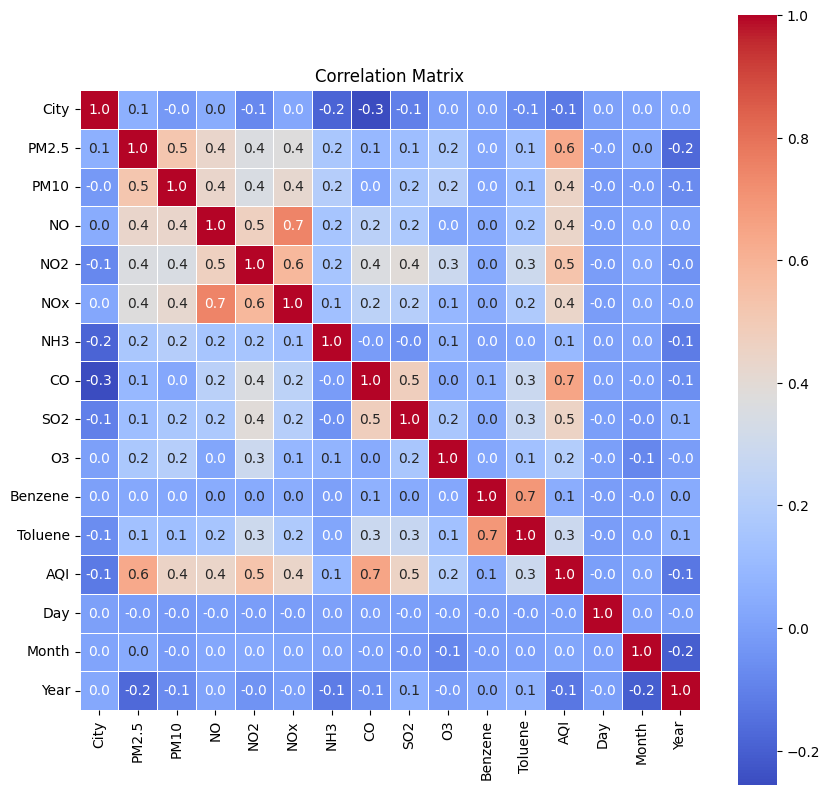

In [94]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr,annot=True, fmt='0.001f', cmap='coolwarm', linewidths=0.5, square=True) # 0.01f should be given for float values.
plt.title('Correlation Matrix')
plt.show()

In [95]:
AQI_corr=data.corr()['AQI']
AQI_corr

,AQI
City,-0.121778
PM2.5,0.633654
PM10,0.447686
NO,0.438039
NO2,0.531952
NOx,0.436282
NH3,0.097916
CO,0.650475
SO2,0.454182
O3,0.199100


In [96]:
AQI_corr=AQI_corr.sort_values(ascending=False)
AQI_corr

,AQI
AQI,1.000000
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
NO,0.438039
NOx,0.436282
Toluene,0.288749
O3,0.199100


<Axes: >

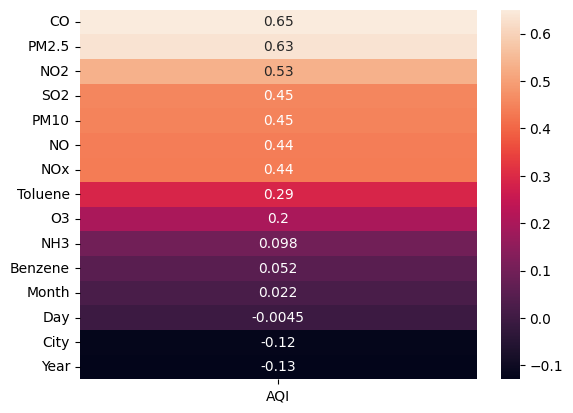

In [97]:
AQI_corr=AQI_corr.drop('AQI')
sns.heatmap(AQI_corr.to_frame(), annot=True, annot_kws={'size': 10})

Taking values with more correlation above **.4**.

**NO** and **NOx** has about same correlation and correlation between both of them are highly corelated so only one of them is taking.

Here **NO** is removed

Similarly with **NOx** and **NO2**

so **NO2** is also removed.

[ 'CO' , 'PM2.5' , 'SO2' , 'PM10' , 'NOx' ]

In [98]:
data = data.drop(['City','NO','NO2','NH3','O3','Benzene','Toluene','Day','Month','Year'],axis=1)
data_unskewed = data      #data after selecting the correlated variable
data

,PM2.5,PM10,NOx,CO,SO2,AQI
0,48.57,95.68,17.15,0.92,27.64,118.0
1,48.57,95.68,16.46,0.97,24.55,118.0
2,48.57,95.68,29.70,17.40,29.07,118.0
3,48.57,95.68,17.97,1.70,18.59,118.0
4,48.57,95.68,37.76,22.10,39.33,118.0
...,...,...,...,...,...,...
29526,15.02,50.94,19.54,0.47,8.55,41.0
29527,24.38,74.09,16.53,0.52,12.72,70.0
29528,22.91,65.73,18.33,0.48,8.42,68.0
29529,16.64,49.97,18.80,0.52,9.84,54.0


### **correlated_data**

In [99]:
correlated_data = data

**Data Skewness**
---

- Visualize the distribution of features using histograms.
- Apply logarithmic transformation to skewed features using np.log1p().
- Visualize the transformed data using histograms and box plots.

In [100]:
data

,PM2.5,PM10,NOx,CO,SO2,AQI
0,48.57,95.68,17.15,0.92,27.64,118.0
1,48.57,95.68,16.46,0.97,24.55,118.0
2,48.57,95.68,29.70,17.40,29.07,118.0
3,48.57,95.68,17.97,1.70,18.59,118.0
4,48.57,95.68,37.76,22.10,39.33,118.0
...,...,...,...,...,...,...
29526,15.02,50.94,19.54,0.47,8.55,41.0
29527,24.38,74.09,16.53,0.52,12.72,70.0
29528,22.91,65.73,18.33,0.48,8.42,68.0
29529,16.64,49.97,18.80,0.52,9.84,54.0


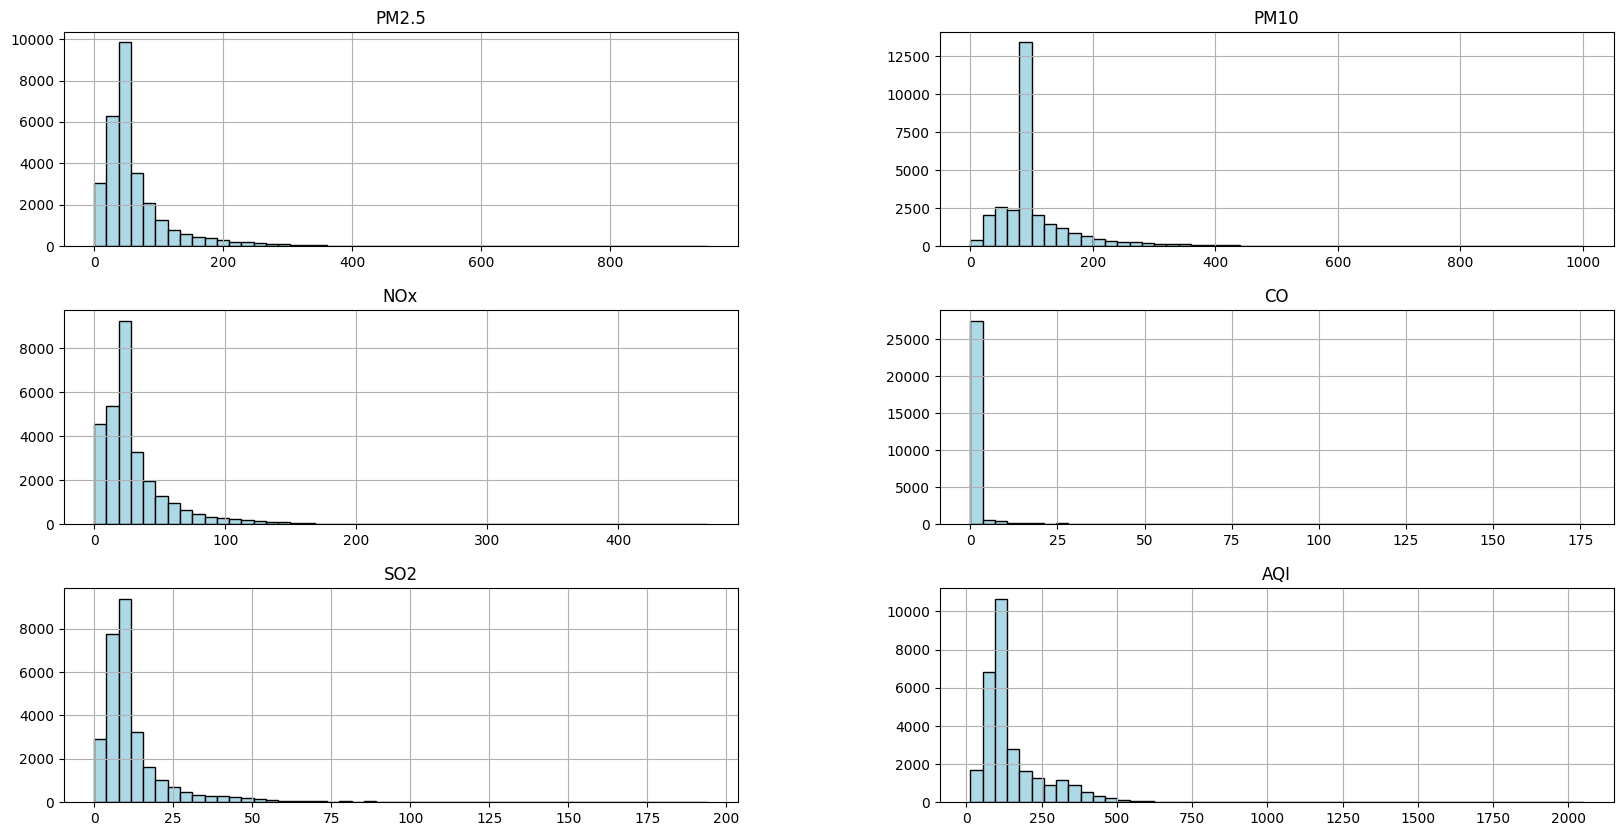

In [101]:
data.hist(color='lightblue',edgecolor='black',figsize=(20,10),bins=50)
plt.show()

In [102]:
data['PM2.5'] = np.log1p(data['PM2.5'])
data['PM10'] = np.log1p(data['PM10'])
data['NOx'] = np.log1p(data['NOx'])
data['CO'] = np.log1p(data['CO'])
data['SO2'] = np.log1p(data['SO2'])
data['AQI'] = np.log1p(data['AQI'])

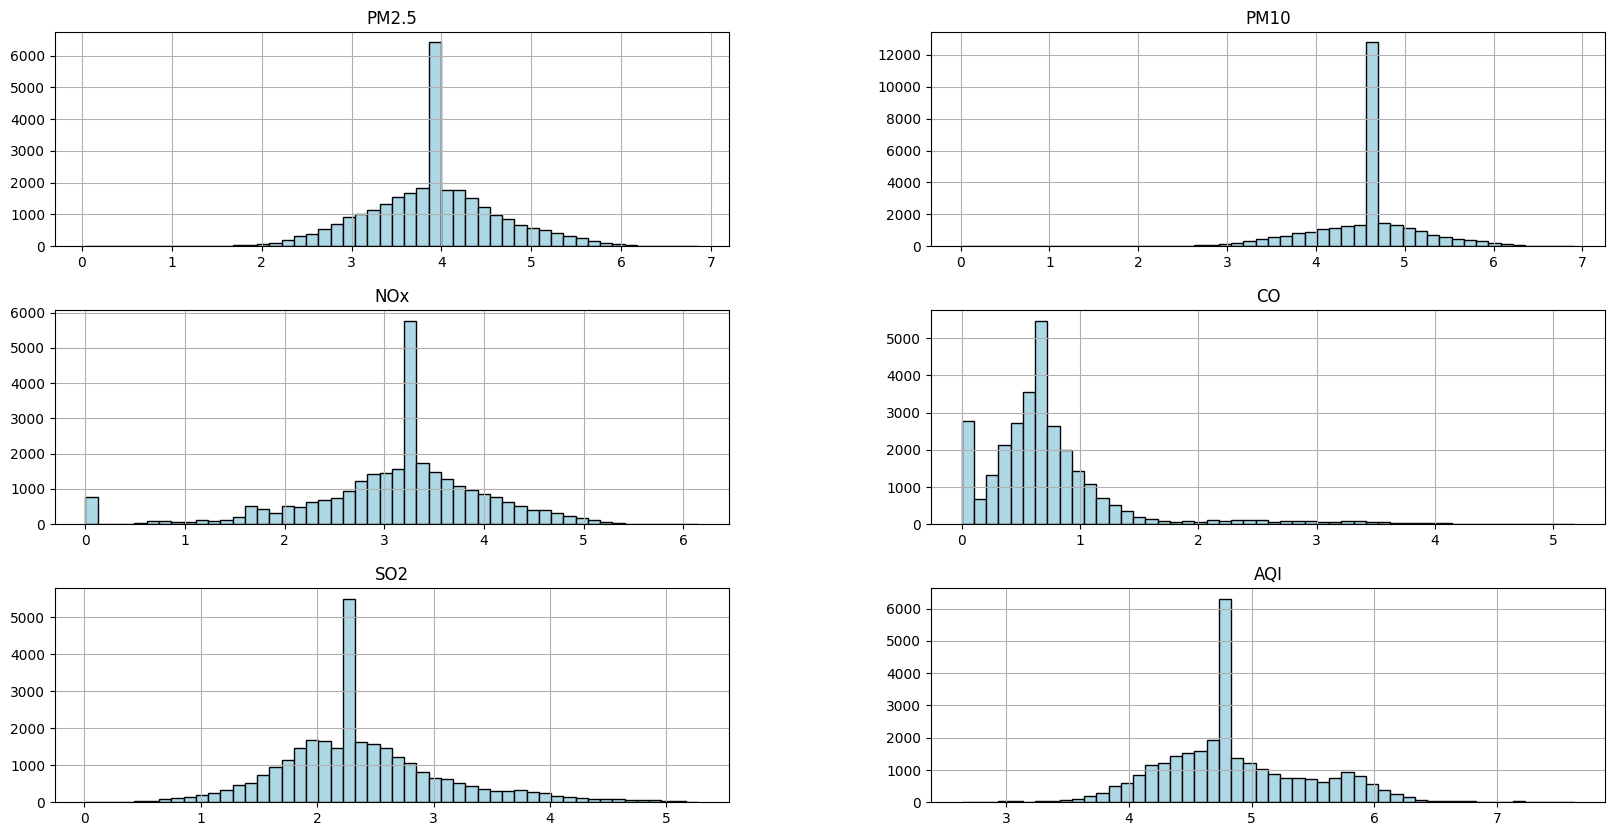

In [103]:
data.hist(color='lightblue',edgecolor='black',figsize=(20,10),bins=50)
plt.show()

<Axes: >

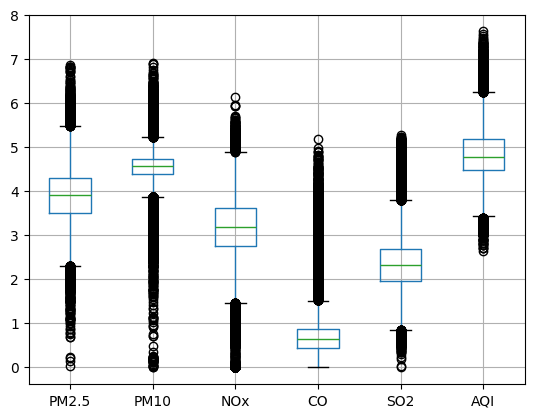

In [104]:
data.boxplot()

### sqewed_data

In [105]:
sqewed_data  = data

**Outlier removing**
---

- Define a function remove_outliers_iqr() to remove outliers using the IQR method, excluding the target variable 'AQI'.
- Apply the outlier removal function to the dataset.

In [106]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(data, exclude_column):
    for col in data.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(data, exclude_column='AQI')
df_cleaned

,PM2.5,PM10,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.859913,0.678034,3.240637,4.779123
3,3.903386,4.571407,2.942859,0.993252,2.975019,4.779123
14,3.903386,4.571407,2.867899,0.470004,3.397524,4.779123
34,4.402442,4.571407,3.218876,1.214913,3.285787,5.686975
...,...,...,...,...,...,...
29526,2.773838,3.950089,3.022374,0.385262,2.256541,3.737670
29527,3.233961,4.318687,2.863914,0.418710,2.618855,4.262680
29528,3.174297,4.200655,2.961658,0.392042,2.242835,4.234107
29529,2.870169,3.931237,2.985682,0.418710,2.383243,4.007333


In [107]:
# # Function to remove outliers using the IQR method except for one column
# def remove_outliers_iqr(data):
#     for col in data.columns:
#         Q1 = data[col].quantile(0.25)
#         Q3 = data[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         # Filter the DataFrame to remove rows with outliers in each column
#         data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
#     return data

# # Specify the column to exclude
# df_cleaned = remove_outliers_iqr(data)
# df_cleaned

**Data scaling**
---

- Standardize or normalize numerical features using StandardScaler or MinMaxScaler.
- Create a new DataFrame with the scaled data.

## standard scalar

In [108]:
from sklearn.preprocessing import StandardScaler

features = df_cleaned.drop('AQI', axis=1)

scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(features)

# Create a new DataFrame with the scaled data (optional)
scaled_df = pd.DataFrame(scaled_data, columns=features.columns, index=features.index)

# You can now use 'scaled_df' for further analysis or modeling
scaled_df

,PM2.5,PM10,NOx,CO,SO2
0,-0.006070,0.010707,-0.552641,0.256578,2.396608
1,-0.006070,0.010707,-0.623840,0.343815,2.146184
3,-0.006070,0.010707,-0.471466,1.413463,1.563556
14,-0.006070,0.010707,-0.609169,-0.362104,2.490312
34,1.000680,0.010707,0.035585,2.165638,2.245218
...,...,...,...,...,...
29526,-2.284714,-2.301561,-0.325394,-0.649662,-0.012413
29527,-1.356504,-0.929802,-0.616490,-0.536161,0.782315
29528,-1.476866,-1.369068,-0.436931,-0.626656,-0.042477
29529,-2.090385,-2.371720,-0.392798,-0.536161,0.265505


## Minmax scalar

In [109]:
# from sklearn.preprocessing import MinMaxScaler

# features = df_cleaned.drop('AQI', axis=1)

# scaler = MinMaxScaler()

# # Fit the scaler to your data and transform it
# scaled_data = scaler.fit_transform(features)

# # Create a new DataFrame with the scaled data, using the correct index
# scaled_df = pd.DataFrame(scaled_data, columns=features.columns, index=features.index) # Use features.index instead of data.index

# # You can now use 'scaled_df' for further analysis or modeling

# Model creation in one step

- Split the data into training and testing sets using train_test_split().
- Choose a regression model (e.g., Linear Regression) and train it using the training data.
- Predict on the test data and evaluate the model using metrics like Mean Squared Error (MSE) and R-squared.


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = df_cleaned['AQI']
# X = data.drop('AQI', axis = 1)
X  = scaled_df[['PM2.5'	,'PM10','NOx'	,'CO','SO2']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

model  = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared error :{mse}')
print(f'R-Squared error    :{r2}')

Mean Squared error :0.04755509377043349
R-Squared error    :0.7092435812485292


# Modeling ended here it is for Further Checking

## pickle


In [138]:
# data.sample()

,PM2.5,PM10,NOx,CO,SO2,AQI
21592,4.461992,4.571407,3.524889,0.732368,1.715598,5.081404


In [1]:
# # Take user input for new dtaa PM2.5, Radio, Newspaper
# PM2_5 = float(input('Enter PM2.5: '))
# PM10 = float(input('Enter PM10: '))
# NOx = float(input('Enter NOx: '))
# CO = float(input('Enter CO: '))
# SO2 = float(input('Enter SO2: '))

# # Create a NUmpy Array with the user input
# user_input = [[PM2_5, PM10, NOx, CO, SO2]]

# # Make a prediction using the trained model
# AQI = model.predict(user_input)
# print(f'The predicted AQI :{AQI}')

In [113]:
# import pickle as pkl

# pkl.dump(model, open('Air_quality_prediction.pkl','wb'))                          # Model name is 'Air_quality_prediction'


In [114]:
# pkl.load(open('Air_quality_prediction.pkl','rb'))

LinearRegression()

a file named model.pkl is show in the file section of colab where the uploaded files are shown

## **another prediction methods**

In [115]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [116]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [117]:
y = df_cleaned['AQI']
# X = data.drop('AQI', axis = 1)
X  = scaled_df[['PM2.5'	,'PM10','NOx'	,'CO','SO2']]

In [118]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [121]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [122]:
# Dictionary to store the results
results = {}

In [123]:
# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes

In [124]:
# Convert results to a DataFrame for better visualization
results2_df = pd.DataFrame(results).T
print(results2_df)

                               MAE      RMSE        R²
Linear Regression         0.157582  0.218071  0.709244
Ridge Regression          0.157583  0.218071  0.709245
Lasso Regression          0.283515  0.404452 -0.000154
ElasticNet Regression     0.283515  0.404452 -0.000154
Decision Tree             0.169480  0.262645  0.578234
Random Forest             0.120759  0.186987  0.786225
Gradient Boosting         0.123646  0.185878  0.788755
Support Vector Regressor  0.134797  0.188466  0.782831
K-Nearest Neighbors       0.128895  0.195048  0.767397
Neural Network            0.135257  0.195237  0.766947


## **YET ANOTHER METHOD**

In [125]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [126]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [127]:
y = df_cleaned['AQI']
# X = data.drop('AQI', axis = 1)
X  = scaled_df[['PM2.5'	,'PM10','NOx'	,'CO','SO2']]

In [128]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
X_train

,PM2.5,PM10,NOx,CO,SO2
16644,-0.200294,0.017629,-0.000029,-0.196542,-0.467690
29232,-1.935258,-2.197697,0.797017,-0.019457,-1.819493
16547,-0.197160,1.610174,-0.053235,-0.319950,0.010436
9811,-1.852272,1.078540,-1.086865,0.428866,-1.106266
23780,-1.066766,-0.078504,-0.208456,-0.864050,0.064321
...,...,...,...,...,...
18727,1.340490,2.002730,-0.000029,0.203138,2.502752
20519,2.095030,0.010707,-2.240960,2.274631,0.136317
8972,-0.110465,0.010707,-1.074722,0.130550,-0.703198
2298,-0.230542,0.297321,-1.853504,0.203138,1.885789


In [130]:
y_train

,AQI
16644,4.644391
29232,4.043051
16547,4.812184
9811,4.488636
23780,4.564348
...,...
18727,4.779123
20519,5.710427
8972,4.488636
2298,4.779123


In [131]:
# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
models = {
    "Linear_Regression": LinearRegression(),
    "RandomForest_Regressor": RandomForestRegressor(),
    "GradientBoosting_Regressor": GradientBoostingRegressor(),
    "DecisionTree_Regressor": DecisionTreeRegressor(),
    "SVM": SVR(),
    #"MLP_Regressor": MLPRegressor(max_iter=500),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'ExtraTreesRegressor' : ExtraTreesRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'LGBMRegressor':LGBMRegressor(),
    #'CatBoostRegressor':CatBoostRegressor(),
    'XGBRegressor': XGBRegressor()
}


In [133]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [134]:
# Dictionary to store the results
results = {}

In [135]:
# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

  # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
results1_df = pd.DataFrame(results).T
print(results1_df)

# **Model Prediction**

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# y = data['AQI']
# # X = data.drop('AQI', axis = 1)
# X  = scaled_df

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [ ]:
# model  = LinearRegression()
# model.fit(X_train,y_train)

In [ ]:
# y_pred = model.predict(X_test)
# y_pred

In [ ]:
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

In [ ]:
# print(f'Mean Squared error :{mse}')
# print(f'R-Squared error    :{r2}')